'data.frame':	50 obs. of  10 variables:
 $ employee_id       : chr  "E1001" "E1002" "E1003" "E1004" ...
 $ gender            : chr  "Male" "Male" "Female" "Male" ...
 $ age               : int  35 38 36 31 25 33 40 35 25 34 ...
 $ job_position      : chr  "Software Engineer" "Data Analyst" "System Administrator" "System Administrator" ...
 $ salary            : num  190000 135000 115000 195000 165000 190000 180000 130000 145000 180000 ...
 $ department        : chr  "Finance" "IT" "IT" "Finance" ...
 $ bonus             : num  7000 19000 7000 13000 15000 20000 9000 15000 14000 8000 ...
 $ years_experience  : int  5 14 13 8 8 1 7 14 10 1 ...
 $ performance_rating: int  3 4 1 2 4 3 4 2 2 5 ...
 $ remote_work       : chr  "Not Eligible" "Eligible" "Eligible" "Eligible" ...


 employee_id           gender               age       job_position      
 Length:50          Length:50          Min.   :25.0   Length:50         
 Class :character   Class :character   1st Qu.:27.0   Class :character  
 Mode  :character   Mode  :character   Median :32.5   Mode  :character  
                                       Mean   :32.2                     
                                       3rd Qu.:36.0                     
                                       Max.   :40.0                     
     salary        department            bonus       years_experience
 Min.   :100000   Length:50          Min.   : 5000   Min.   : 1.00   
 1st Qu.:130000   Class :character   1st Qu.: 9000   1st Qu.: 6.25   
 Median :160000   Mode  :character   Median :14000   Median :10.00   
 Mean   :154900                      Mean   :12980   Mean   : 8.82   
 3rd Qu.:180000                      3rd Qu.:16750   3rd Qu.:12.00   
 Max.   :200000                      Max.   :20000   Max.   :15.00   

Warning message:
"package 'dplyr' was built under R version 4.4.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union





Female   Male 
  0.24   0.76 

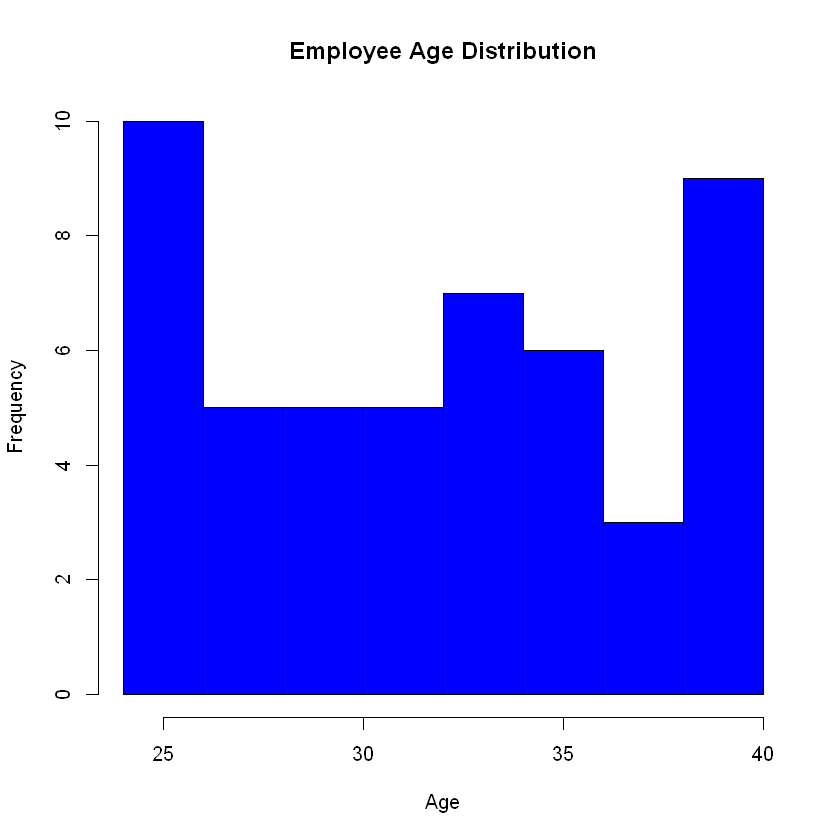

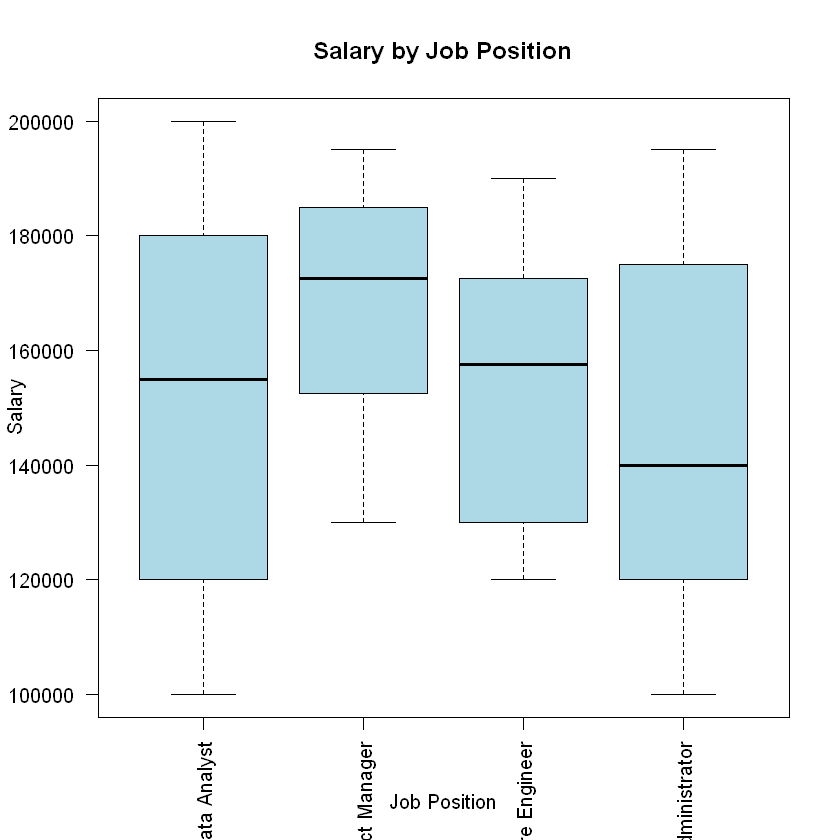

$num_employees
[1] 9

$avg_salary
[1] 167777.8

$avg_rating
[1] 3.222222

[1] -0.3313165


Call:
lm(formula = salary ~ years_experience, data = employees)

Residuals:
   Min     1Q Median     3Q    Max 
-54466 -18819   4419  20534  45534 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      176157.4     9601.9  18.346   <2e-16 ***
years_experience  -2410.1      990.7  -2.433   0.0188 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28150 on 48 degrees of freedom
Multiple R-squared:  0.1098,	Adjusted R-squared:  0.09122 
F-statistic: 5.919 on 1 and 48 DF,  p-value: 0.01876


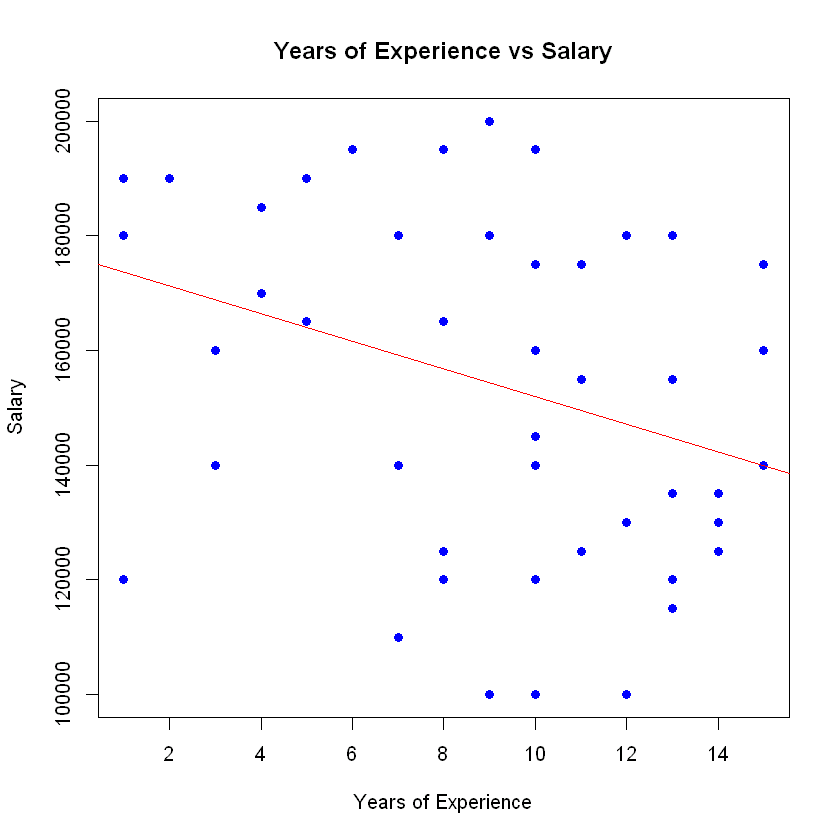

In [1]:
set.seed(22001672)  

employee_id <- paste0("E", 1001:1050)

gender <- sample(c("Male", "Female"), 50, replace = TRUE, prob = c(0.75, 0.25))

age <- sample(25:40, 50, replace = TRUE)

job_position <- sample(c("Software Engineer", "Data Analyst", "System Administrator", "Project Manager"), 50, replace = TRUE)

salary <- sample(seq(100000, 200000, by = 5000), 50, replace = TRUE)

department <- sample(c("IT", "Finance", "HR", "Marketing"), 50, replace = TRUE)

bonus <- sample(seq(5000, 20000, by = 1000), 50, replace = TRUE)

years_experience <- sample(1:15, 50, replace = TRUE)

performance_rating <- sample(1:5, 50, replace = TRUE)

remote_work <- sample(c("Eligible", "Not Eligible"), 50, replace = TRUE, prob = c(0.6, 0.4))

employees <- data.frame(employee_id, gender, age, job_position, salary, department, bonus, years_experience, performance_rating, remote_work)

str(employees)

summary(employees)

employees$total_compensation <- employees$salary + employees$bonus

employees$employee_id <- as.factor(employees$employee_id)

it_remote <- subset(employees, department == "IT" & remote_work == "Eligible")

high_performance <- subset(employees, performance_rating >= 4)

library(dplyr)
avg_salary_by_dept <- employees %>%
    group_by(department) %>%
    summarise(avg_salary = mean(salary))

table(employees$gender) / nrow(employees)

hist(employees$age, main="Employee Age Distribution", xlab="Age", col="blue", border="black")

boxplot(salary ~ job_position, data=employees, main="Salary by Job Position", xlab="Job Position", ylab="Salary", col="lightblue", las=2)

plot(employees$years_experience, employees$salary, main="Years of Experience vs Salary",
     xlab="Years of Experience", ylab="Salary", pch=16, col="blue")
abline(lm(salary ~ years_experience, data=employees), col="red")

avg_bonus_rating <- employees %>%
    group_by(job_position) %>%
    summarise(avg_bonus = mean(bonus), avg_rating = mean(performance_rating))

avg_experience_gender <- employees %>%
    group_by(gender) %>%
    summarise(avg_experience = mean(years_experience))

finance_salaries <- employees$salary[employees$department == "Finance"]
finance_ci <- t.test(finance_salaries, conf.level = 0.95)$conf.int

department_stats <- function(dept) {
    dept_data <- subset(employees, department == dept)
    list(
        num_employees = nrow(dept_data),
        avg_salary = mean(dept_data$salary),
        avg_rating = mean(dept_data$performance_rating)
    )
}

department_stats("HR")

cor(employees$years_experience, employees$salary)

salary_model <- lm(salary ~ years_experience, data=employees)
summary(salary_model)

write.csv(employees, "22001672.csv", row.names=FALSE)
